<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/data-driven-science-and-engineering/01-svd/07_pca_ovarian_cancer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PCA:Ovarian Cancer Data

The ovarian cancer data set consists of gene data for 216 patients, 121
of whom have ovarian cancer, and 95 of whom do not. For each patient, there is a vector of
data containing the expression of 4000 genes. 

There are multiple challenges with this type
of data, namely the high dimension of the data features.

However, we see that there is significant variance captured in the first few PCA modes.

The ability to visualize patterns and correlations in high-dimensional data
is an important reason to use PCA, and PCA has been widely used to find patterns in highdimensional
biological and genetic data.

More importantly, patients with ovarian cancer appear to cluster separately from patients
without cancer when plotted in the space spanned by the first three PCA modes.


##Setup

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

In [ ]:
%%shell

wget https://github.com/rahiakela/data-science-research-and-practice/raw/main/data-driven-science-and-engineering/01-svd/datasets/ovariancancer_obs.csv
wget https://github.com/rahiakela/data-science-research-and-practice/raw/main/data-driven-science-and-engineering/01-svd/datasets/ovariancancer_grp.csv

Let's load data.

In [3]:
obs = np.loadtxt("ovariancancer_obs.csv", delimiter=",")

f = open("ovariancancer_grp.csv", "r")
grp = f.read().split("\n")

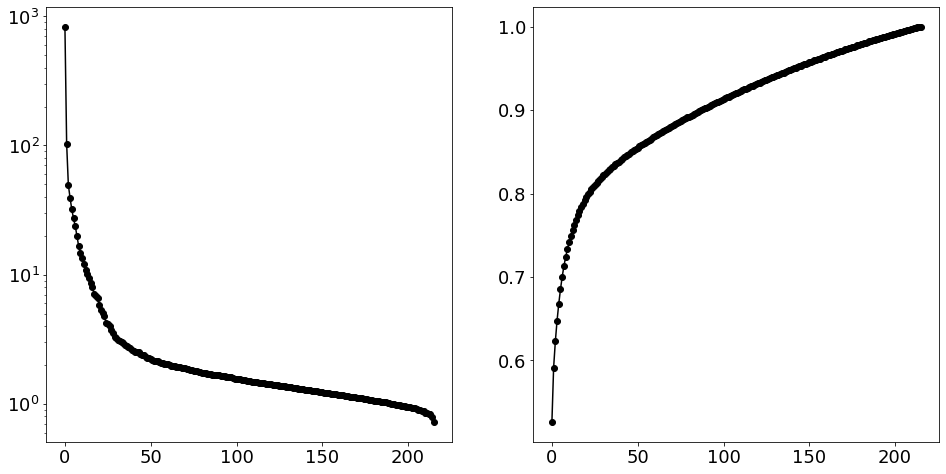

In [10]:
U, S, VT = np.linalg.svd(obs, full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S, "-o", color="k")
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S) / np.sum(S), "-o", color="k")

plt.show()

More importantly, patients with ovarian cancer appear to cluster separately from patients
without cancer when plotted in the space spanned by the first three PCA modes.

This inherent clustering in PCA space
of data by category is a foundational element of machine learning and pattern recognition.

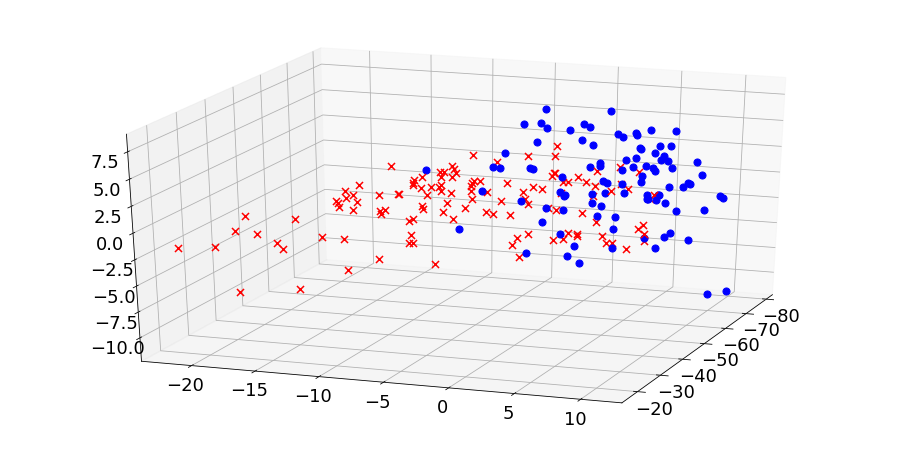

In [11]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection="3d")

for j in range(obs.shape[0]):
  x = VT[0, :] @ obs[j, :].T
  y = VT[1, :] @ obs[j, :].T
  z = VT[2, :] @ obs[j, :].T

  if grp[j] == "Cancer":
    ax.scatter(x, y, z, marker="x", color="r", s=50)
  else:
    ax.scatter(x, y, z, marker="o", color="b", s=50)

ax.view_init(25, 20)
plt.show()

Clustering of samples that are normal and those that have cancer in the first three principal component coordinates.